In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
C = 150e-12 #F
v_r = -75e-3    #V
v_L = -45e-3    #V
k = 1.2
a = 0.01
b = 5
c = -56e-3  #V
d = 130
v_pico = 50e-3  #V

tmax = 0.5
dt = 0.001

N = round(tmax/dt)

t = np.arange(0, tmax, dt)

In [31]:
def corrente(I,t, ti, tf):
    return I*(t>=ti)-I*(t>=tf)


def dvdt(v, u, I):
    return ( k * (v-v_r) * (v-v_L) - u + I ) / C


def dudt(v, u):
    return a * (b * (v-v_r) - u)


def euler(I):
    v = np.zeros(N)
    u = np.zeros(N)

    v[0] = v_r
    u[0] = 0

    for i in range(N-1):
        if v[i] > v_pico:
            u[i] = u[i] + d
            v[i] = c

        u[i+1] = u[i] + dt * dudt(v[i], u[i])
        v[i+1] = v[i] + dt * dvdt(v[i], u[i], I[i])

    return v, u

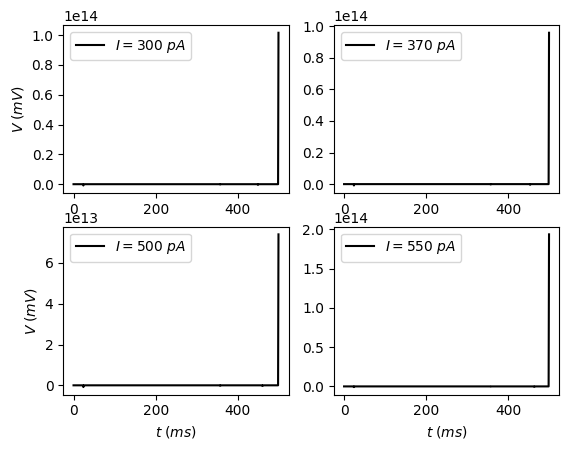

In [32]:
valores_I = [300e-12, 370e-12, 500e-12, 550e-12]

for i in range(4):
    I_inj = valores_I[i]
    I = corrente(I_inj, t, ti=0.02, tf=0.45)

    v, u = euler(I)
    plt.subplot(2,2,i+1)
    plt.plot(t*1e3, v*1e3, 'k', label=f'$I = {I_inj*1e12:.0f} \;pA$')
    plt.legend()

    if i == 2 or i == 3:
        plt.xlabel(r'$t\;(ms)$')
    if i == 0 or i == 2:
        plt.ylabel(r'$V\;(mV)$')

plt.show()